# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# **A)**

**Step 1: Load and clean the data**

In [1]:
# Mount Google Drive (for Colab)
from google.colab import drive
drive.mount('/content/drive')
print("Drive mounted at /content/drive")

Mounted at /content/drive
Drive mounted at /content/drive


In [4]:
# Load dataset
file_path = "/content/drive/MyDrive/Fundamental of Intelligent Systems/Final/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Drop CustomerID if present (not useful for clustering)
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])

# Check for missing values
df.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.dropna()


**Step 2: Select numerical features only**

In [ ]:
# Select numerical columns
numerical_features = df.select_dtypes(include=["int64", "float64"])

numerical_features.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


**Step 3: Standardize the features**

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)


**Step 4: Apply PCA (2D) for visualization only**

In [ ]:
from sklearn.decomposition import PCA


# PCA (for visualization only)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

pca_df.head()


,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


**Step 5: Visualize PCA space**

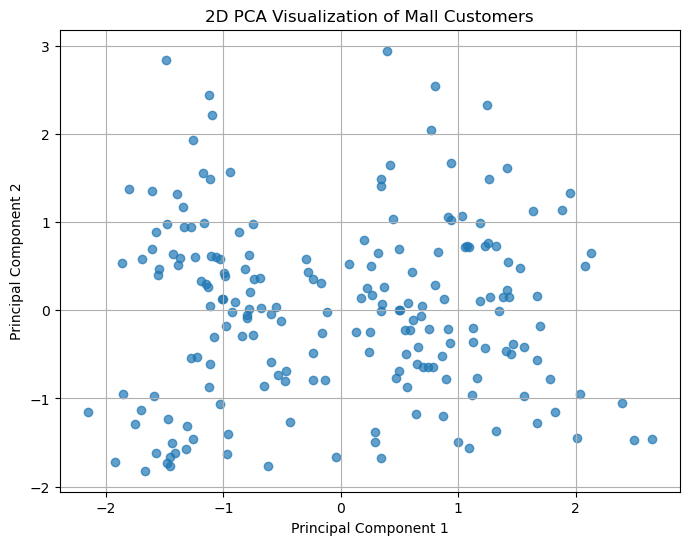

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Mall Customers")
plt.grid(True)
plt.show()


# **B)KMeans: K = 2 … 10**


In [ ]:
kmeans_results = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)

    inertia = km.inertia_
    silhouette = silhouette_score(X_scaled, labels)

    kmeans_results.append([k, inertia, silhouette])

kmeans_df = pd.DataFrame(
    kmeans_results,
    columns=["K", "Inertia", "Silhouette"]
)

print("\nKMeans Results:")
print(kmeans_df)

best_k = int(kmeans_df.loc[kmeans_df["Silhouette"].idxmax(), "K"])
print(f"\nSelected K (best silhouette): {best_k}")


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi


KMeans Results:
    K     Inertia  Silhouette
0   2  389.386189    0.335472
1   3  295.212246    0.357793
2   4  205.225147    0.403958
3   5  168.247580    0.416643
4   6  133.868334    0.427428
5   7  117.011555    0.417232
6   8  103.828578    0.408681
7   9   92.349458    0.420074
8  10   81.987052    0.397284

Selected K (best silhouette): 6


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# **C) Agglomerative Clustering (K = best_k)**

In [ ]:
linkages = ["single", "complete", "average", "ward"]
agg_results = []

for link in linkages:
    agg = AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels = agg.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    agg_results.append([link, sil])

agg_df = pd.DataFrame(
    agg_results,
    columns=["Linkage", "Silhouette"]
)

print("\nAgglomerative Results:")
print(agg_df)

best_linkage = agg_df.loc[agg_df["Silhouette"].idxmax(), "Linkage"]
print(f"\nBest linkage: {best_linkage}")



Agglomerative Results:
    Linkage  Silhouette
0    single   -0.042750
1  complete    0.374561
2   average    0.389573
3      ward    0.420117

Best linkage: ward


# **D) DBSCAN Grid Search**

In [ ]:
eps_values = [0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_values = [3, 5, 10]

dbscan_results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        noise_ratio = np.mean(labels == -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters >= 2:
            sil = silhouette_score(X_scaled[labels != -1],
                                    labels[labels != -1])
        else:
            sil = np.nan

        dbscan_results.append([eps, ms, n_clusters, noise_ratio, sil])

dbscan_df = pd.DataFrame(
    dbscan_results,
    columns=["eps", "min_samples", "n_clusters", "noise_ratio", "Silhouette"]
)

print("\nDBSCAN Results:")
print(dbscan_df)

best_dbscan = dbscan_df.loc[dbscan_df["Silhouette"].idxmax()]
print("\nBest DBSCAN setting:")
print(best_dbscan)



DBSCAN Results:
    eps  min_samples  n_clusters  noise_ratio  Silhouette
0   0.2            3          11        0.805    0.645880
1   0.2            5           1        0.975         NaN
2   0.2           10           0        1.000         NaN
3   0.4            3          10        0.295    0.442575
4   0.4            5           6        0.490    0.519023
5   0.4           10           2        0.850    0.766073
6   0.6            3           3        0.070    0.214881
7   0.6            5           2        0.140    0.273047
8   0.6           10           4        0.330    0.529589
9   0.8            3           1        0.015         NaN
10  0.8            5           1        0.030         NaN
11  0.8           10           1        0.115         NaN
12  1.0            3           1        0.005         NaN
13  1.0            5           1        0.010         NaN
14  1.0           10           1        0.025         NaN

Best DBSCAN setting:
eps             0.400000
min_samp

# **E)PCA Visualization of Best Models**

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


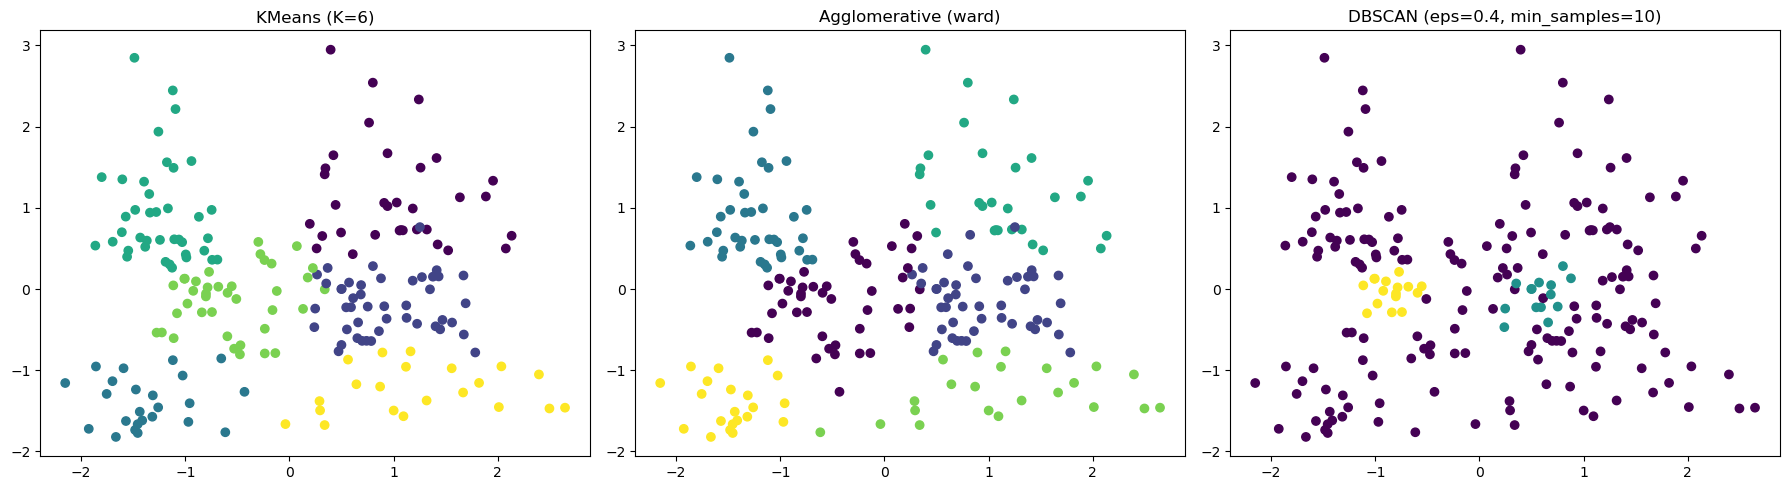

In [ ]:
# Best KMeans
kmeans_best = KMeans(n_clusters=best_k, n_init=20, random_state=42)
labels_km = kmeans_best.fit_predict(X_scaled)

# Best Agglomerative
agg_best = AgglomerativeClustering(
    n_clusters=best_k,
    linkage=best_linkage
)
labels_agg = agg_best.fit_predict(X_scaled)

# Best DBSCAN
db_best = DBSCAN(
    eps=best_dbscan["eps"],
    min_samples=int(best_dbscan["min_samples"])
)
labels_db = db_best.fit_predict(X_scaled)

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km)
plt.title(f"KMeans (K={best_k})")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg)
plt.title(f"Agglomerative ({best_linkage})")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db)
plt.title(f"DBSCAN (eps={best_dbscan['eps']}, min_samples={int(best_dbscan['min_samples'])})")

plt.tight_layout()
plt.show()
